# AI Methods for Business
This code was authored by Jochem Vis and Jelle Schelvis as part of the coursework for the Master's program in Digital Driven Business, specifically the "AI Methods for Business" course at the Amsterdam University of Applied Sciences. Dr. D. Bhaumik served as the consulting instructor for this project, which took place from December 13, 2023, to January 8, 2024.

The research question addressed in this project is as follows: "Which groups have the potential to be of interest to the bank for the implementation of loyalty card programs?" This analysis is based on the examination of a provided dataset, namely, "marketing_campaign.csv," using unsupervised machine learning methods. The primary objective is to identify distinct groups within the dataset that may be of strategic interest to the bank.


## Dataset

- **TransactionID**: Transaction unique identifier
- **CustomerID**: Customer unique identifier
- **CustomerDOB**: Customer date of birth
- **CustGender**: Gender of the customer
- **CustLocation**: The location of the customer when the transaction took place
- **CustAccountBalance**: Customer account balance at the moment of the transaction
- **TransactionDate**: The date the transaction took place
- **TransactionTime**: The time the transaction took place
- **TransactionAmount (INR)**: The amount in Indian Rupees of the transaction


In [3]:
# Importing the basic libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
import seaborn as sns
from sklearn.decomposition import PCA
pd.set_option('display.max_columns', None)

In [4]:
# Reading the data
df = pd.read_csv("bank_transactions.csv")
df_original_len = len(df)
print('Original length of dataframe:', df_original_len)

Original length of dataframe: 1048567


## 1: Data Cleaning and Feature Engineering
In this section, we delve into the exploration, cleaning, and preparation of the dataset to make it suitable for machine learning methods. Our objectives include removing duplicate records, addressing anomalous and missing values, and engineering new features from the existing ones to enhance the dataset's usability.

In [5]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [6]:
# Assuming you have a DataFrame named df
data_types = df.dtypes

# Display the data types
print(data_types)

TransactionID               object
CustomerID                  object
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime              int64
TransactionAmount (INR)    float64
dtype: object


### Gender

The dataset used for this analysis exhibits a noticeable gender imbalance, with a higher representation of male individuals (766,338) compared to females (282,228). This imbalance can potentially influence the interpretation of results and the generalizability of findings.

Within the dataset, a category labeled as 'Gender T' was identified, but it appeared only once. Due to its limited occurrence, the decision was made to exclude this category from the dataset to maintain a more balanced analysis. As a result, the primary focus of the analysis revolves around the comparison between male and female individuals.

Furthermore, to enhance the dataset's compatibility with unsupervised machine learning methods, we standardized the values by changing 'F' to 0 and 'M' to 1. This transformation was performed to convert the 'CustomerID' feature from a float to an int64 data type, ensuring seamless utilization of the data for unsupervised machine learning analyses.

Despite these improvements, some missing values persisted. Given that all values were transformed into numerical ones, we opted to employ the K-Nearest Neighbors (KNN) imputer to handle these missing values without significantly altering the data distribution. A hyperparameter of 20 neighbors was selected for the KNN imputation to strike a balance between accuracy and computational efficiency. This approach ensures the data's completeness and prepares it for further analysis.

In [7]:
# Drop T within CustGender
df = df[df['CustGender'] != 'T']

#Tranform F into 0 and M into 1
dict_gender = {'F': 0, 'M': 1}
df.replace({'CustGender':dict_gender }, inplace = True)

df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,0.0,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,1.0,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,0.0,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,0.0,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,0.0,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


CustGender
1.0    765530
0.0    281936
Name: count, dtype: int64


/var/folders/9v/4rlxfp694fg9tyxs68rm0h4w0000gn/T/ipykernel_96809/3703900499.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CustGender', data=df, palette='PuRd')


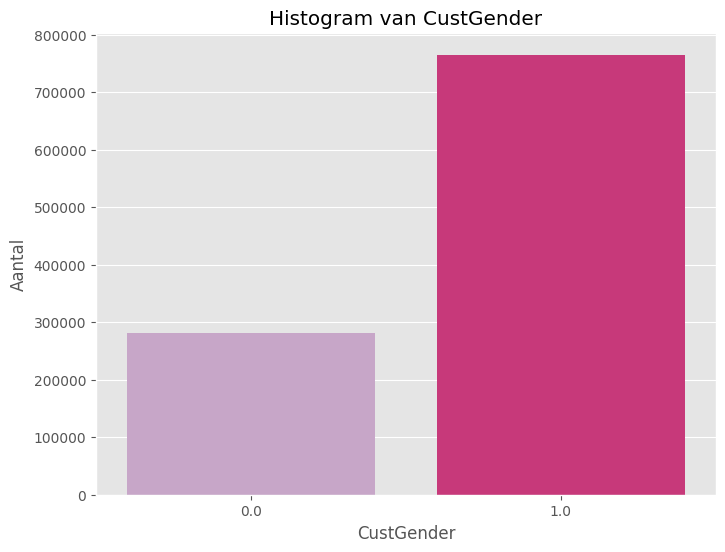

In [8]:
# Frequenties CustGender
frequentietabel = df['CustGender'].value_counts()
print(frequentietabel)

# Plot CustGender in a histogram to check distribution
plt.style.use("ggplot")
plt.figure(figsize=(8, 6))
sns.countplot(x='CustGender', data=df, palette='PuRd')
plt.title('Histogram van CustGender')
plt.xlabel('CustGender')
plt.ylabel('Aantal')
plt.show()

In [9]:
# Count the number of missing values in the "CustLocation" column
missing_values_count = df['CustLocation'].isna().sum()

# Print the number of missing values
print("Number of missing values in 'CustLocation':", missing_values_count)

Number of missing values in 'CustLocation': 151


In [10]:
# Initialize the KNNImputer with k=5 (you can adjust k as needed)
knn_imputer = KNNImputer(n_neighbors=20)

# Perform KNN imputation on the 'CustGender' feature
df['CustGender'] = knn_imputer.fit_transform(df[['CustGender']])

# Round the imputed values to the nearest integer (0 or 1)
df['CustGender'] = df['CustGender'].round().astype(int)

CustGender
1    766630
0    281936
Name: count, dtype: int64


/var/folders/9v/4rlxfp694fg9tyxs68rm0h4w0000gn/T/ipykernel_96809/3703900499.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CustGender', data=df, palette='PuRd')


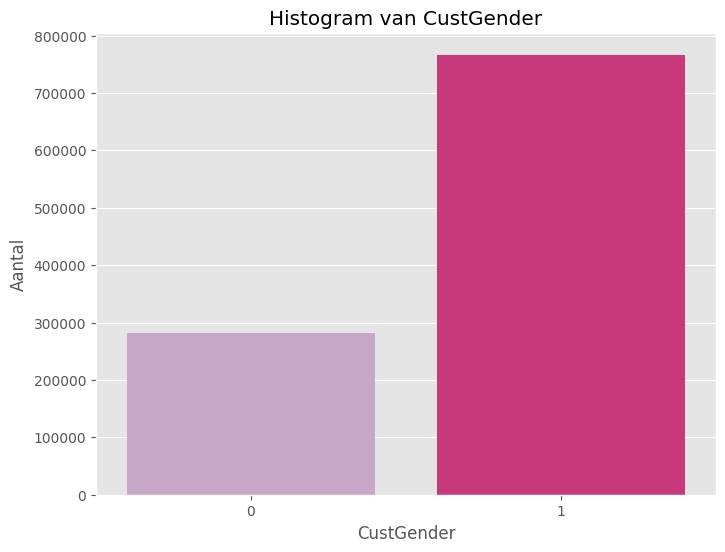

In [11]:
# Frequenties CustGender
frequentietabel = df['CustGender'].value_counts()
print(frequentietabel)

# Plot CustGender in a histogram to check distribution
plt.style.use("ggplot")
plt.figure(figsize=(8, 6))
sns.countplot(x='CustGender', data=df, palette='PuRd')
plt.title('Histogram van CustGender')
plt.xlabel('CustGender')
plt.ylabel('Aantal')
plt.show()

### Customer Location
The majority of transactions originated from Mumbai, assigned the LocationID 1, followed by New Delhi (LocationID 2), Bangalore (LocationID 3), Gurgaon (LocationID 4), and others. Fortunately, there were no missing values in the dataset, resulting in a total of 9,355 unique values for the "CustLocation" feature.

While some locations were further categorized into north, west, south, and east parts of the city, we made the strategic decision to retain this division. Recognizing that different parts of the city may exhibit varying economic profiles in the Indian context, preserving this granularity proved beneficial.

To enhance the dataset's utility for unsupervised machine learning methods, we replaced all unique location values with corresponding LocationIDs, providing a unique identifier for each city in the dataset. This transformation was facilitated by creating a reference table named "city_mapping_df," which was then merged with the original DataFrame. Consequently, all location values were converted to int64 data types.

LocationID 1 corresponds to the city with the highest frequency in the dataset, which is Mumbai. Subsequently, LocationIDs were allocated in descending order based on city frequency, ensuring that the most frequent cities received the lowest LocationIDs, while the least frequent cities received higher ones.

/var/folders/9v/4rlxfp694fg9tyxs68rm0h4w0000gn/T/ipykernel_96809/1140593226.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.countplot(y='CustLocation', data=df, palette='PuRd_r',


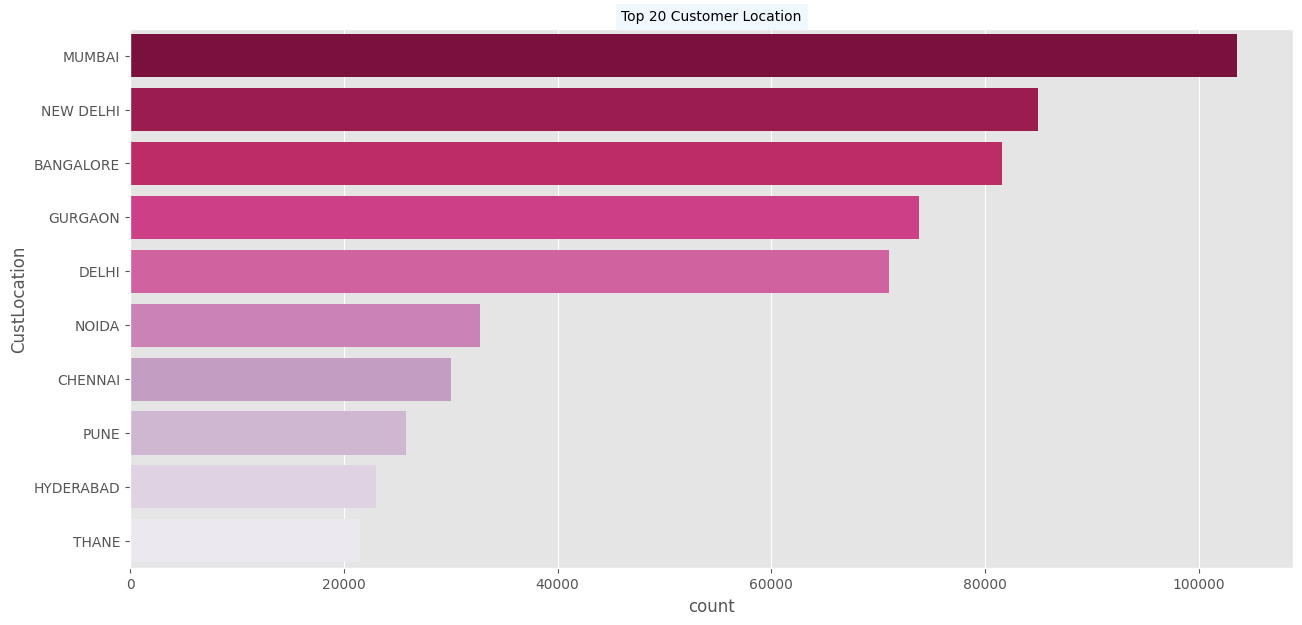

In [12]:
plt.style.use("ggplot")
plt.figure(figsize=(15, 7))
chart = sns.countplot(y='CustLocation', data=df, palette='PuRd_r', 
                     order=df['CustLocation'].value_counts()[:10].index)
plt.title("Top 20 Customer Location",
          fontsize='10',
          backgroundcolor='AliceBlue',
          color='black');


In [13]:
# Impute missing values in 'CustLocation' with the mode (most frequent value)
mode_value = df['CustLocation'].mode()[0]
df['CustLocation'].fillna(mode_value, inplace=True)


In [14]:
descriptives = df['CustAccountBalance'].describe()

# Druk de resultaten af
print(descriptives)

count    1.046197e+06
mean     1.154036e+05
std      8.464858e+05
min      0.000000e+00
25%      4.721760e+03
50%      1.679218e+04
75%      5.765736e+04
max      1.150355e+08
Name: CustAccountBalance, dtype: float64


In [15]:
unique_locations = df['CustLocation'].nunique()
print("Number of unique values in 'CustLocation':", unique_locations)

Number of unique values in 'CustLocation': 9355


In [16]:
data_type = df['CustLocation'].dtype
print("Data type of 'CustLocation':", data_type)

Data type of 'CustLocation': object


In [17]:
# Count the number of missing values in the "CustLocation" column
missing_values_count = df['CustLocation'].isna().sum()

# Print the number of missing values
print("Number of missing values in 'CustLocation':", missing_values_count)

Number of missing values in 'CustLocation': 0


In [18]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,0,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,1,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,0,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,0,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,0,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [19]:
# Count the occurrences of each city
city_counts = df['CustLocation'].value_counts().reset_index()

# Rename the columns for clarity
city_counts.columns = ['CustLocation', 'Count']

# Sort the cities by count in descending order
city_counts = city_counts.sort_values(by='Count', ascending=False).reset_index(drop=True)

# Add a 'LocationID' column starting from 1
city_counts['LocationID'] = city_counts.index + 1

# Merge the 'LocationID' back into the original DataFrame
df = df.merge(city_counts[['CustLocation', 'LocationID']], on='CustLocation', how='left')

# Drop the 'CustLocation' column
df.drop(columns=['CustLocation'], inplace=True)

# Display the first few rows of the updated DataFrame
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),LocationID
0,T1,C5841053,10/1/94,0,17819.05,2/8/16,143207,25.0,63
1,T2,C2142763,4/4/57,1,2270.69,2/8/16,141858,27999.0,114
2,T3,C4417068,26/11/96,0,17874.44,2/8/16,142712,459.0,1
3,T4,C5342380,14/9/73,0,866503.21,2/8/16,142714,2060.0,1
4,T5,C9031234,24/3/88,0,6714.43,2/8/16,181156,1762.5,13


In [20]:
# Find the city corresponding to LocationID 1
city_with_location_id_1 = city_counts[city_counts['LocationID'] == 1]['CustLocation'].values[0]

print("City corresponding to LocationID 1:", city_with_location_id_1)

City corresponding to LocationID 1: MUMBAI


/var/folders/9v/4rlxfp694fg9tyxs68rm0h4w0000gn/T/ipykernel_96809/1164672650.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.countplot(y='LocationID', data=df, palette='PuRd_r',


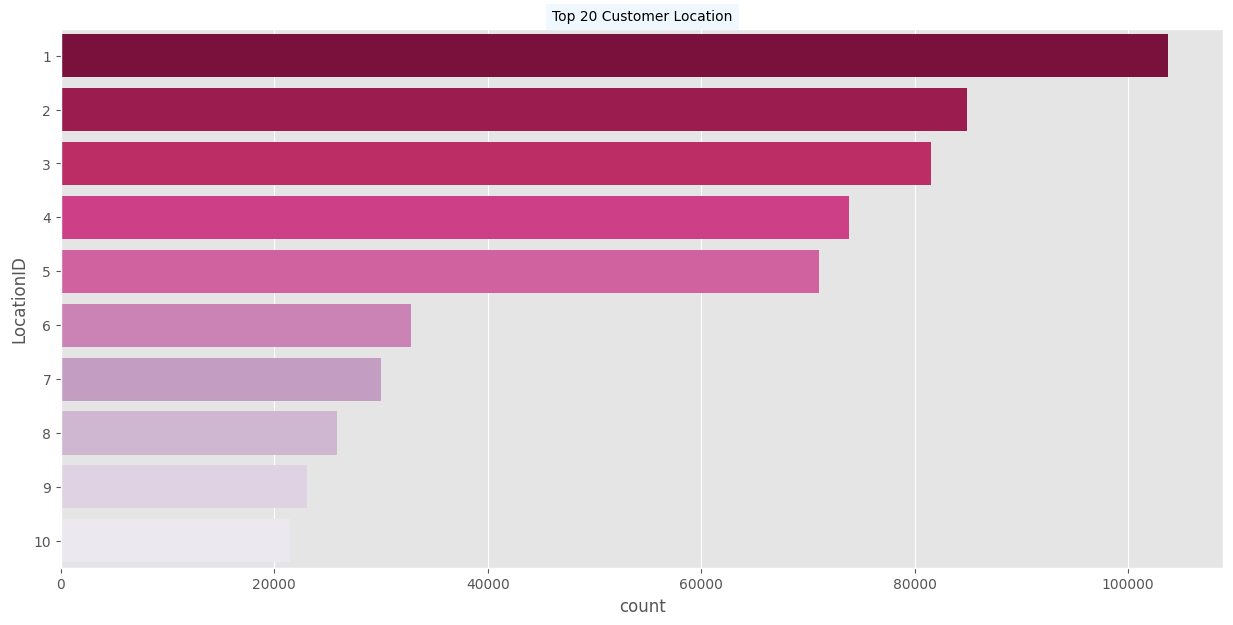

In [21]:
plt.style.use("ggplot")
plt.figure(figsize=(15, 7))
chart = sns.countplot(y='LocationID', data=df, palette='PuRd_r', 
                     order=df['LocationID'].value_counts()[:10].index)
plt.title("Top 20 Customer Location",
          fontsize='10',
          backgroundcolor='AliceBlue',
          color='black');

In [22]:
# Count the number of missing values in the "CustLocation" column
missing_values_count = df['LocationID'].isna().sum()

# Print the number of missing values
print("Number of missing values in 'LocationID':", missing_values_count)

Number of missing values in 'LocationID': 0


In [23]:
unique_locations = df['LocationID'].nunique()
print("Number of unique values in 'LocationID':", unique_locations)

Number of unique values in 'LocationID': 9355


In [24]:
data_type = df['LocationID'].dtype
print("Data type of 'LocationID':", data_type)

Data type of 'LocationID': int64


### Customer Date of Birth

In the dataset, the "CustomerDOB" feature represents customers' dates of birth. During the initial data preprocessing phase, we created a new feature called "Age" by calculating each customer's age based on their date of birth. This transformation was undertaken to introduce a more interpretable and meaningful feature.

However, upon further analysis of the data, we encountered anomalies in the distribution of ages derived from this feature. Notably, instances where customers were reported to be over 200 years old and others with ages below 0 raised concerns about data accuracy.

To address this issue, we implemented the following steps:

1. **Outlier Handling:** We identified customers with ages below 0 and those with ages exceeding 100 as potential outliers. To maintain data integrity and consistency, we made the decision to treat these values as missing data (NaN). This step was taken to mitigate the influence of extreme values on our analyses.

2. **Missing Data Imputation:** To impute missing values in the "Age" feature, we employed the K-Nearest Neighbors (KNN) imputation technique with a k-value of 5 neighbors. This method leverages the similarity between data points to estimate and assign appropriate ages for missing values. After imputation, we ensured that the distribution of ages remained comparable to the original distribution, validating the effectiveness of the imputation process.

The choice to address outliers and impute missing values using KNN with 5 neighbors was guided by our commitment to maintaining data quality and the integrity of our analyses, while preserving the overall characteristics of the "Age" feature distribution.

Upon examination of the figures, it is apparent that the distribution of the 'CustomerDOB' feature closely resembles a normal distribution, with the peak occurring at an approximate age of 36 years. Furthermore, the standard deviation from the mean is approximately 5.1, indicating a moderate level of dispersion around the central tendency.

/var/folders/9v/4rlxfp694fg9tyxs68rm0h4w0000gn/T/ipykernel_96809/1916657944.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'], errors='coerce')


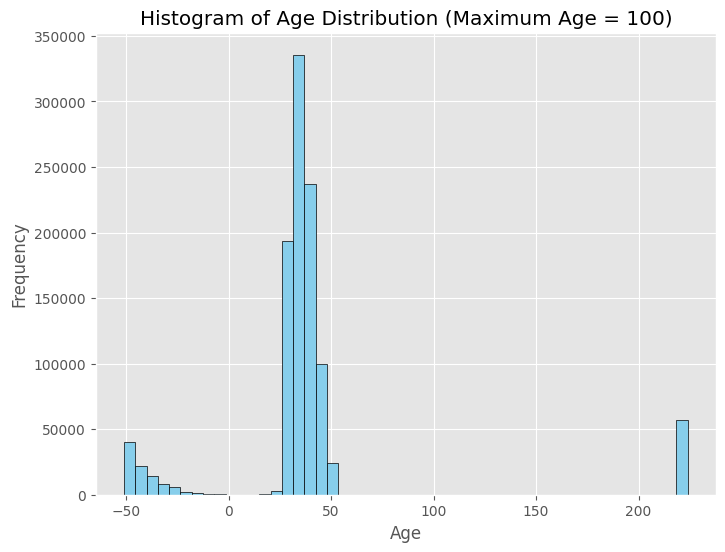

Maximale leeftijd: 224.0
Minimale leeftijd: -51.0
Het aantal rijen in de DataFrame is: 57338


In [25]:
# Ensure CustomerDOB is in datetime format
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'], errors='coerce')

# Calculate age
current_date = pd.to_datetime('today')
df['Age'] = (current_date - df['CustomerDOB']).dt.days // 365

# Create a histogram of the 'Age' feature with a maximum x-axis value of 100
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=50, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age Distribution (Maximum Age = 100)')

# Show the plot
plt.show()
# Ga ervan uit dat je een DataFrame hebt genaamd df met een 'age' kolom
max_age = df['Age'].max()
min_age = df['Age'].min()

# Print de maximale en minimale leeftijd
print(f"Maximale leeftijd: {max_age}")
print(f"Minimale leeftijd: {min_age}")

# Filter de DataFrame waar de leeftijd groter is dan 100
filtered_df = df[df['Age'] > 100]

# Toon de eerste vijf rijen van het gefilterde DataFrame
filtered_df.head()

aantal_rijen = len(filtered_df)
print(f"Het aantal rijen in de DataFrame is: {aantal_rijen}")


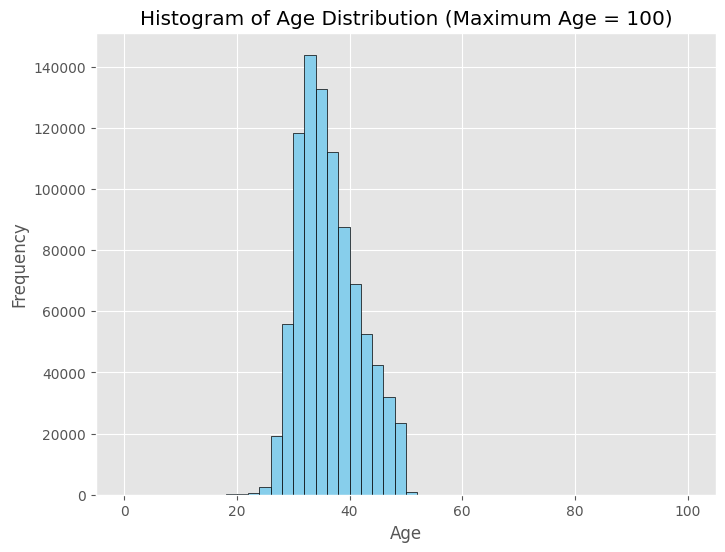

In [26]:
# Create a histogram of the 'Age' feature with a maximum x-axis value of 100
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=50, range=(0, 100), color='skyblue', edgecolor='black')  # Adjust the number of bins as needed

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age Distribution (Maximum Age = 100)')

# Show the plot
plt.show()

In [27]:
# Replace values greater than 100 with NaN
df.loc[df['Age'] > 100, 'Age'] = np.nan

# Replace values greater than 100 with NaN
df.loc[df['Age'] < 0, 'Age'] = np.nan

# Assuming you have a DataFrame named df with an 'Age' column containing NaN values

batch_size = 10000  # Adjust the batch size as needed

# Determine the total number of rows
total_rows = df.shape[0]

# Initialize the KNNImputer with the desired number of neighbors
imputer = KNNImputer(n_neighbors=5)

# Iterate through the data in batches
for start in range(0, total_rows, batch_size):
    end = min(start + batch_size, total_rows)
    batch_df = df.iloc[start:end].copy()  # Create a copy of the batch
    batch_df['Age'] = imputer.fit_transform(batch_df[['Age']])
    df.iloc[start:end] = batch_df  # Update the original DataFrame with the imputed values



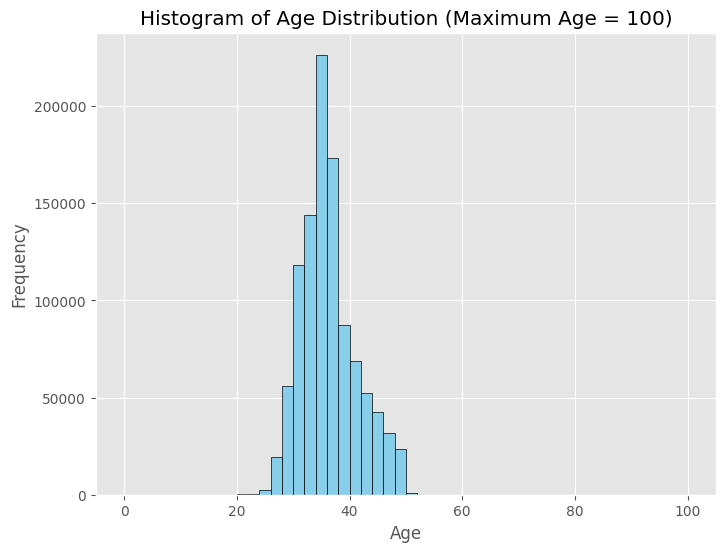

In [28]:
# Create a histogram of the 'Age' feature with a maximum x-axis value of 100
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=50, range=(0, 100), color='skyblue', edgecolor='black')  # Adjust the number of bins as needed

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age Distribution (Maximum Age = 100)')

# Show the plot
plt.show()

In [29]:
# Get statistics for 'Age' feature
age_stats = df['Age'].describe()

# Print the statistics
print(age_stats)

count    1.048566e+06
mean     3.592161e+01
std      4.947331e+00
min      0.000000e+00
25%      3.200000e+01
50%      3.580531e+01
75%      3.800000e+01
max      5.000000e+01
Name: Age, dtype: float64


In [30]:
# Assuming your DataFrame is named 'df'
df.drop(columns=['CustomerDOB'], inplace=True)

### CustAccountBalance
The "CustAccountBalance" feature in our dataset exhibits a distinct right-skewed distribution, characterized by a few data points with exceptionally high values that extend the tail of the distribution. This skewness is reflected in the statistical summary:

- **Mean (Average):** The mean "CustAccountBalance" is approximately 115,403,600 INR (Indian Rupees), indicating the central tendency of the data. However, it is noteworthy that the mean is influenced by the presence of outliers, particularly those with significantly higher balances.

- **Standard Deviation:** The standard deviation of approximately 845,529 INR quantifies the degree of dispersion or variability within the "CustAccountBalance" values. The relatively large standard deviation suggests a wide spread of account balances, with some accounts exhibiting substantial deviations from the mean.

- **Minimum Value:** The minimum "CustAccountBalance" is 0 INR, which represents the lowest observed account balance in our dataset.

- **Maximum Value:** The maximum "CustAccountBalance" is an impressive 115,035,500 INR, signifying the presence of accounts with substantial holdings.

In [31]:
# Use describe() for the 'CustAccountBalance' feature
cust_balance_description = df['CustAccountBalance'].describe()

# Display the description
print(cust_balance_description)

count    1.046197e+06
mean     1.154036e+05
std      8.464858e+05
min      0.000000e+00
25%      4.721760e+03
50%      1.679218e+04
75%      5.765736e+04
max      1.150355e+08
Name: CustAccountBalance, dtype: float64


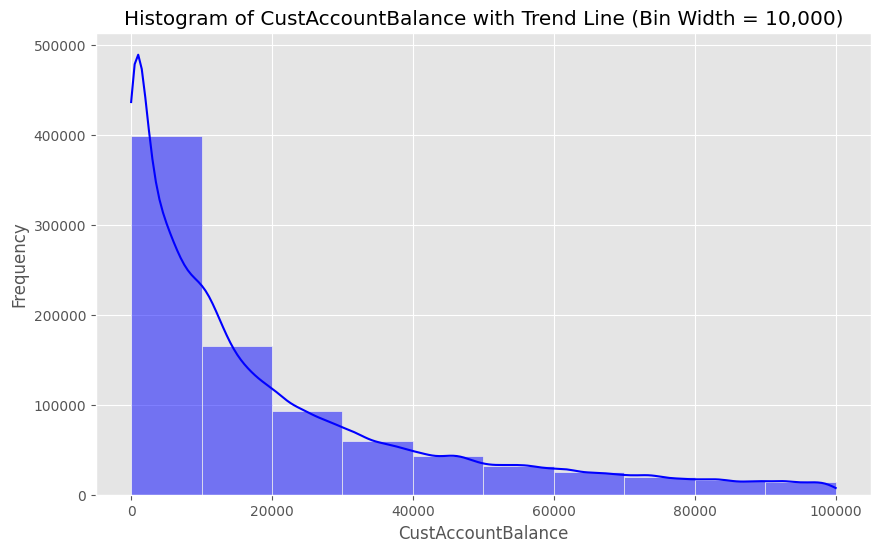

In [32]:
# Filter the data to include values less than or equal to 100,000
filtered_data = df[df['CustAccountBalance'] <= 100000]

# Create a histogram with larger bins (10,000 increments) and a trend line
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['CustAccountBalance'], kde=True, color='blue', binwidth=10000)

# Set labels and title
plt.xlabel('CustAccountBalance')
plt.ylabel('Frequency')
plt.title('Histogram of CustAccountBalance with Trend Line (Bin Width = 10,000)')

# Show the plot
plt.show()


In [33]:
# Initialize the KNNImputer with a specified number of neighbors (e.g., 5)
imputer = KNNImputer(n_neighbors=5)

# Impute missing values in the 'TransactionAmount (INR)' feature
df['CustAccountBalance'] = imputer.fit_transform(df[['CustAccountBalance']])

### Transaction Date
For the "TransactionDate" feature, there were no missing values. To enhance data interpretability, a new feature was created, namely "DayOfWeek," which indicates the day of the week for each transaction. The differences between days are relatively small, suggesting a fairly uniform distribution of transactions throughout the week.

Upon analyzing transaction patterns based on the "DayOfWeek" feature derived from "TransactionDate," the following insights were gained:

- **Tuesday**: Transactions exhibit a relatively higher frequency on Tuesdays.

- **Thursday**: Transactions show a relatively lower frequency on Thursdays.

To prepare the data for unsupervised machine learning models, the "DayOfWeek" feature was transformed into numerical values as follows: Monday (1), Tuesday (2), Wednesday (3), Thursday (4), Friday (5), Saturday (6), and Sunday (7). This transformation allows for seamless integration of the feature into machine learning algorithms.

/var/folders/9v/4rlxfp694fg9tyxs68rm0h4w0000gn/T/ipykernel_96809/1426877084.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TransactionDate'] = pd.to_datetime(df['TransactionDate']) # Convert to datetime


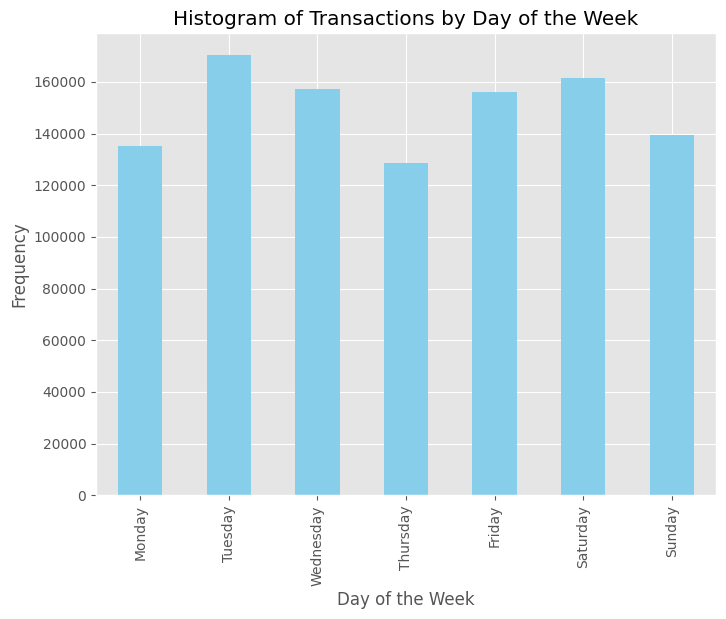

In [34]:
# Assuming your DataFrame is named df
df['TransactionDate'] = pd.to_datetime(df['TransactionDate']) # Convert to datetime
df['DayOfWeek'] = df['TransactionDate'].dt.day_name()

df.head()

# Define the order of days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a histogram
plt.figure(figsize=(8, 6))
df['DayOfWeek'].value_counts().loc[days_order].plot(kind='bar', color='skyblue')

# Set plot labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.title('Histogram of Transactions by Day of the Week')

# Show the plot
plt.show()

In [35]:
dict_days_week = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday' : 5, 'Saturday' : 6, 'Sunday' : 7}


df.replace({"DayOfWeek": dict_days_week}, inplace = True)


In [36]:
# Assuming your DataFrame is named 'df'
df.drop(columns=['TransactionDate'], inplace=True)


### Transaction Time

The "TransactionTime" feature was utilized to derive a new feature, "Hour of the Day," which indicates the hour when the transaction occurred. The feature Transaction Time is then dropped. There were no missing values in this feature. The mean transaction time is approximately 15, with a standard deviation of approximately 5.1. The distribution of transaction times exhibits characteristics reminiscent of a normal distribution.

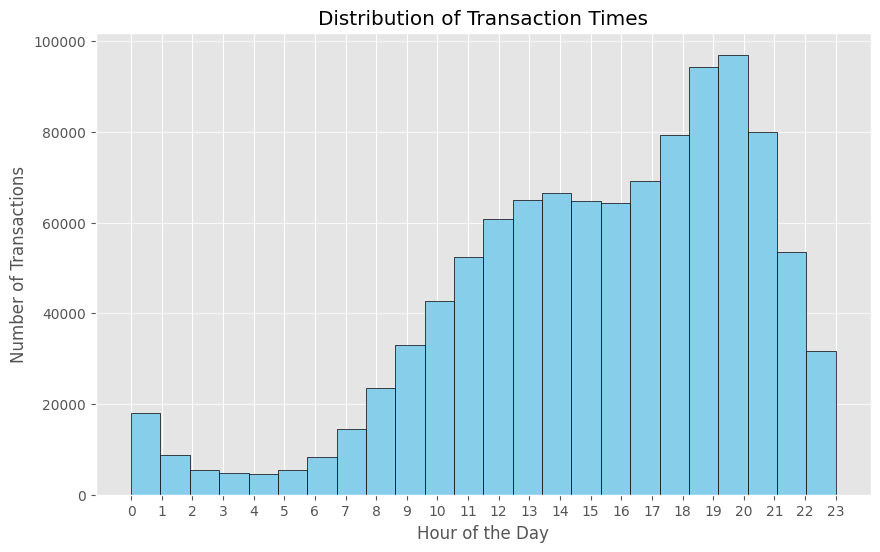

In [37]:
# Convert the TransactionTime to a more readable format (hours)
df['TransactionHour'] = df['TransactionTime'] // 10000

# Plotting the distribution of transaction times
plt.figure(figsize=(10, 6))
plt.hist(df['TransactionHour'], bins=24, edgecolor='black', color='skyblue')
plt.title('Distribution of Transaction Times')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.75)
plt.show()

In [38]:
# Use describe() for the 'CustAccountBalance' feature
cust_balance_description = df['TransactionHour'].describe()

# Calculate and add the median manually
median = df['TransactionHour'].median()
cust_balance_description['median'] = median

# Display the updated description
print(cust_balance_description)

count     1.048566e+06
mean      1.541093e+01
std       5.127052e+00
min       0.000000e+00
25%       1.200000e+01
50%       1.600000e+01
75%       2.000000e+01
max       2.300000e+01
median    1.600000e+01
Name: TransactionHour, dtype: float64


In [39]:
# Assuming your DataFrame is named 'df'
df.drop(columns=['TransactionTime'], inplace=True)

### Transaction Amount (INR)

There were no missing values in this feature. The mean transaction amount in Indian Rupees (INR) is 1,574, with a standard deviation of 6,574 from the mean. Additionally, upon examining the plot, it is evident that the distribution of this feature exhibits a right-skewed pattern.

In [40]:
# Count the number of missing values in the "CustLocation" column
missing_values_count = df['TransactionAmount (INR)'].isna().sum()

# Print the number of missing values
print("Number of missing values in 'TransactionAmount (INR)':", missing_values_count)

Number of missing values in 'TransactionAmount (INR)': 0


In [41]:
# Use describe() for the 'CustAccountBalance' feature
cust_balance_description = df['TransactionAmount (INR)'].describe()

# Calculate and add the median manually
median = df['TransactionAmount (INR)'].median()
cust_balance_description['TransactionAmount (INR)'] = median

# Display the updated description
print(cust_balance_description)

count                      1.048566e+06
mean                       1.574306e+03
std                        6.574677e+03
min                        0.000000e+00
25%                        1.610000e+02
50%                        4.590300e+02
75%                        1.200000e+03
max                        1.560035e+06
TransactionAmount (INR)    4.590300e+02
Name: TransactionAmount (INR), dtype: float64


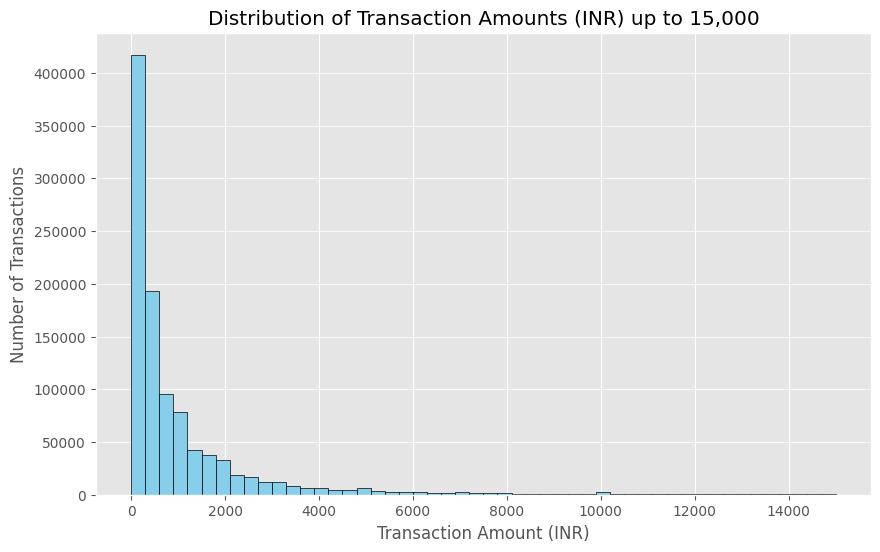

In [42]:
# Plot the distribution of transaction amounts focusing on amounts up to 15,000 INR
plt.figure(figsize=(10, 6))
plt.hist(df['TransactionAmount (INR)'], bins=50, edgecolor='black', color='skyblue', range=(0, 15000))
plt.title('Distribution of Transaction Amounts (INR) up to 15,000')
plt.xlabel('Transaction Amount (INR)')
plt.ylabel('Number of Transactions')
plt.grid(axis='y', alpha=0.75)
plt.show()

### Grouping data on CustomerID

In [43]:
df.head()

,TransactionID,CustomerID,CustGender,CustAccountBalance,TransactionAmount (INR),LocationID,Age,DayOfWeek,TransactionHour
0,T1,C5841053,0,17819.05,25.0,63,29.000000,1,14
1,T2,C2142763,1,2270.69,27999.0,114,36.020774,1,14
2,T3,C4417068,0,17874.44,459.0,1,27.000000,1,14
3,T4,C5342380,0,866503.21,2060.0,1,36.020774,1,14
4,T5,C9031234,0,6714.43,1762.5,13,35.000000,1,18


In [44]:
# Grouping and aggregating the data, including the first day of the week of a transaction
grouped_data = df.groupby('CustomerID').agg(
    frequency=('TransactionID', 'count'),  # Total number of transactions
    Transaction_Amount=('TransactionAmount (INR)', 'mean'),  # Average transaction amount
    AccountBalance=('CustAccountBalance', 'mean'),  # Average account balance
    Gender=('CustGender', 'first'),  # Customer gender
    Age=('Age', 'first'),  # First recorded age of the customer
    Location=('LocationID', 'first'),  # First recorded location of the customer
    DayOfWeek=('DayOfWeek', 'first')  # First day of the week of a transaction
).reset_index()

# Rename the 'frequency' column to 'Frequentie'
grouped_data.rename(columns={'frequency': 'Frequentie'}, inplace=True)

# Sorting based on the total number of transactions
grouped_data = grouped_data.sort_values(by='Frequentie', ascending=False)

# Display the first few rows of the grouped dataset
grouped_data.head()

,CustomerID,Frequentie,Transaction_Amount,AccountBalance,Gender,Age,Location,DayOfWeek
497426,C5533885,6,475.756667,23088.798333,1,33.000000,11,7
628691,C6735477,6,417.333333,84234.390000,1,33.000000,701,5
716853,C7537344,6,3599.583333,22066.763333,0,40.000000,9,5
83551,C1736254,6,925.750000,579921.823333,0,34.000000,14,5
330644,C4021562,6,1632.671667,98384.980000,1,36.036745,22,2


In [45]:
# Assuming your DataFrame is named 'df'
grouped_data.drop(columns=['CustomerID'], inplace=True)


### Corelation Matrix 

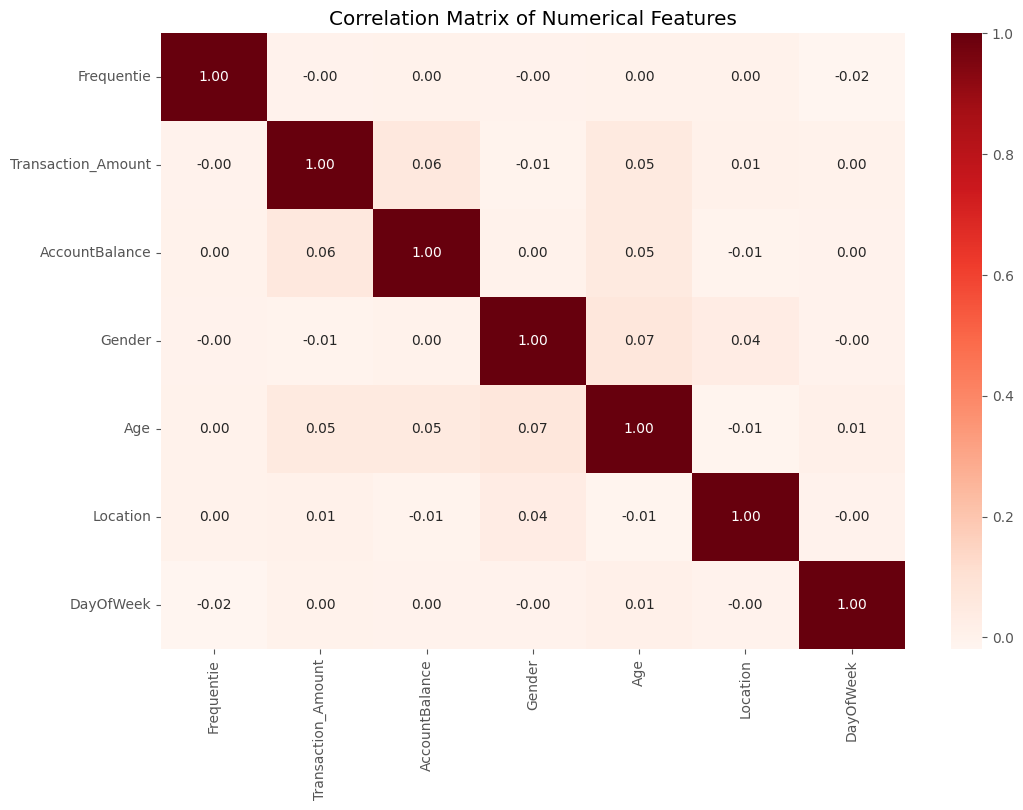

In [46]:
# Calculating the correlation matrix
correlation_matrix = grouped_data.corr()

# Define a custom color palette with various shades of pink
custom_palette = sns.color_palette("Reds", as_cmap=True)

# Plotting the correlation matrix using the custom palette
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=custom_palette, fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# feature scaling

In [47]:
# define standard scaler instance
scaler = StandardScaler()
# Fitting the StandardScaler to df
scaler.fit(grouped_data)
# Scaling df used the fitting Standard scalar
df_scaled = pd.DataFrame(scaler.transform(grouped_data), columns=grouped_data.columns)

In [48]:
df_scaled.head()

,Frequentie,Transaction_Amount,AccountBalance,Gender,Age,Location,DayOfWeek
0,10.681989,-0.170572,-0.115038,0.606759,-0.590896,-0.271835,1.524527
1,10.681989,-0.179640,-0.038639,0.606759,-0.590896,0.577549,0.516919
2,10.681989,0.314271,-0.116315,-1.648101,0.823934,-0.274297,0.516919
3,10.681989,-0.100729,0.580700,-1.648101,-0.388777,-0.268142,0.516919
4,10.681989,0.008991,-0.020959,0.606759,0.022887,-0.258294,-0.994492


## PCA

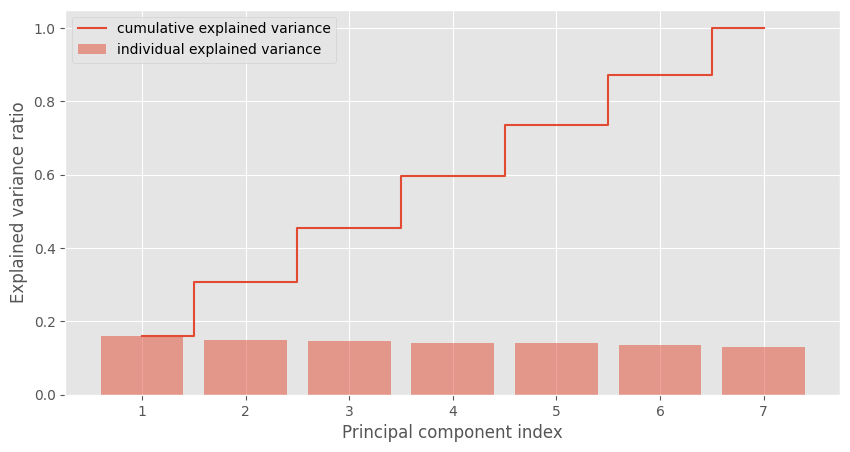

In [47]:
from sklearn.decomposition import PCA
pca = PCA()
pca_comps = pca.fit_transform(df_scaled) # pca components
var_exp = pca.explained_variance_ratio_ # variance explained ratio 
cum_var_exp = np.cumsum(var_exp) # cumulative variance

# plot of explained variances
fig = plt.figure(figsize=(10, 5), dpi=100)
plt.bar(range(1,len(var_exp)+1), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,len(var_exp)+1), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()


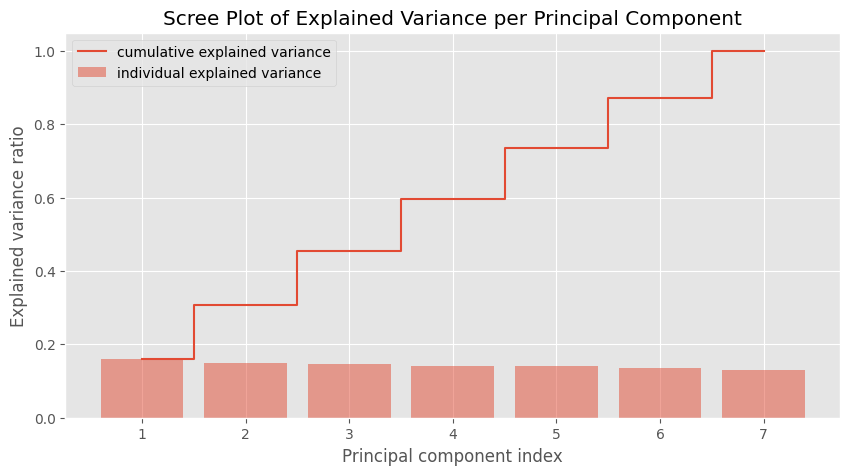

In [48]:
# Perform PCA on the numeric data
pca = PCA()
pca_comps = pca.fit_transform(df_scaled)  # pca components
var_exp = pca.explained_variance_ratio_  # variance explained ratio
cum_var_exp = np.cumsum(var_exp)  # cumulative variance

# Plot explained variances
fig = plt.figure(figsize=(10, 5), dpi=100)
plt.bar(range(1, len(var_exp) + 1), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(var_exp) + 1), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.title('Scree Plot of Explained Variance per Principal Component')
plt.grid(True)

# Show the plot
plt.show()


In [49]:
# Perform PCA on the numeric data
pca = PCA()
pca_comps = pca.fit_transform(grouped_data)  # pca components

# Get the absolute loadings for each feature
loadings = np.abs(pca.components_)

# Calculate the overall contribution of each feature
overall_contribution = loadings.sum(axis=0)

# Create a DataFrame to store the feature names and their overall contributions
feature_contributions_df = pd.DataFrame({'Feature': grouped_data.columns, 'Overall Contribution': overall_contribution})

# Sort the features by overall contribution in descending order
feature_contributions_df = feature_contributions_df.sort_values(by='Overall Contribution', ascending=False)

# Display the sorted feature contributions
print(feature_contributions_df)

              Feature  Overall Contribution
3              Gender              1.046045
0          Frequentie              1.043890
4                 Age              1.011416
6           DayOfWeek              1.010936
1  Transaction_Amount              1.001470
5            Location              1.001040
2      AccountBalance              1.000478


In [51]:
most_important_features_idx = [np.abs(pca.components_[i]).argmax() for i in range(pca.n_components_)]
most_important_features = df_scaled.columns[most_important_features_idx]

print('The most important features are:', most_important_features.values)

The most important features are: ['Age' 'Gender' 'DayOfWeek' 'Location' 'DayOfWeek' 'AccountBalance']


In [53]:
#Let's say you would like to explain x% variance  
var_exp_thres = 0.85
#calling pcs instance with desired variance explained threshold
pca = PCA(var_exp_thres)  
pca_comps = pca.fit_transform(df_scaled)  
print('Number of components to explain {:0.0f}% variance is {}'.format(var_exp_thres*100, pca.n_components_))

Number of components to explain 85% variance is 6


## KMeans 

In [10]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer  # $ pip install yellowbrick for the Elbow method

In [11]:
# Instantiate the clustering model and visualizer
kmeans = KMeans(n_clusters=6)  # You can specify the number of clusters here
visualizer = KElbowVisualizer(kmeans, k=(4, 12))
visualizer.fit(pca_comps)  # Fit the PCA component data to the visualizer
visualizer.show()  # Finalize and render the figure
print('The best cluster number is:', visualizer.elbow_value_)  # Get elbow value

NameError: name 'pca_comps' is not defined

In [ ]:
kmeans_best_cluster = KMeans(n_clusters=visualizer.elbow_value_)
kmeans_best_cluster.fit(pca_comps)
#saving the cluster labels
Kmeans_clusters_PCs = kmeans_best_cluster.labels_

/Users/jelleschelvis/anaconda3/envs/AI_for_Business/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/Users/jelleschelvis/anaconda3/envs/AI_for_Business/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jelleschelvis/anaconda3/envs/AI_for_Business/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jelleschelvis/anaconda3/envs/AI_for_Business/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jelleschelvis/anaconda3/envs/AI_for_Business/lib/pytho

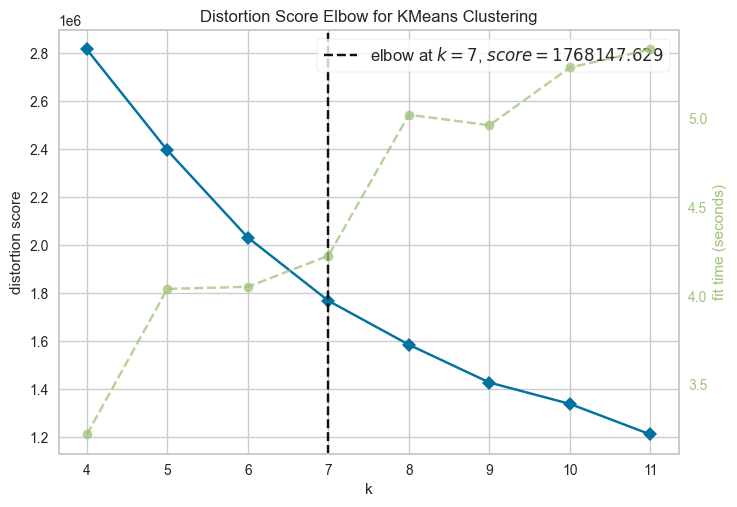

The best cluster number is: 7


In [ ]:
# Instantiate the clustering model and visualizer
kmeans = KMeans(random_state=3092)
visualizer = KElbowVisualizer(kmeans, k=(4,12))
visualizer.fit(df_scaled[most_important_features])        # Fit the important features data to the visualizer
visualizer.show()        # Finalize and render the figure
visualizer.elbow_value_ # Get elbow value

print('The best cluster number is:', visualizer.elbow_value_) # Get elbow value

In [ ]:
## Kmeans with 7 clusters
kmeans_best_cluster = KMeans(n_clusters=visualizer.elbow_value_)
kmeans_best_cluster.fit(df_scaled[most_important_features])
#saving the cluster labels
Kmeans_clusters_ImpFeatures = kmeans_best_cluster.labels_

/Users/jelleschelvis/anaconda3/envs/AI_for_Business/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/Users/jelleschelvis/anaconda3/envs/AI_for_Business/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jelleschelvis/anaconda3/envs/AI_for_Business/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jelleschelvis/anaconda3/envs/AI_for_Business/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jelleschelvis/anaconda3/envs/AI_for_Business/lib/pytho

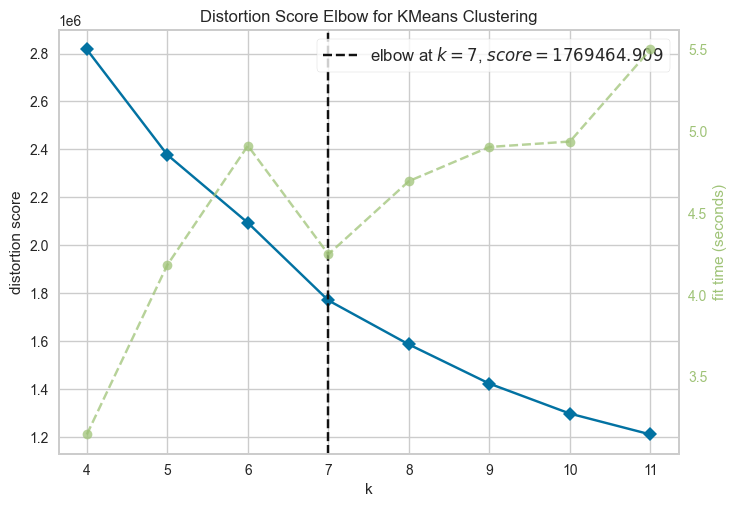

The best cluster number is: 7


In [ ]:
# Instantiate the clustering model and visualizer
kmeans = KMeans(n_clusters=4)  # Specify the number of clusters you want to test
visualizer = KElbowVisualizer(kmeans, k=(4, 12))
visualizer.fit(df_scaled[most_important_features])  # Fit the important features data to the visualizer
visualizer.show()  # Finalize and render the figure

# Get the elbow value
elbow_value = visualizer.elbow_value_
print('The best cluster number is:', elbow_value)


In [ ]:
## Kmeans with 7 clusters
kmeans_best_cluster = KMeans(n_clusters=visualizer.elbow_value_)
kmeans_best_cluster.fit(df_scaled[most_important_features])
#saving the cluster labels
Kmeans_clusters_ImpFeatures = kmeans_best_cluster.labels_

/Users/jelleschelvis/anaconda3/envs/AI_for_Business/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
from sklearn import metrics
sc = []
dbi = []

#metrics from imporant PC features method
sc.append(metrics.silhouette_score(pca_comps, Kmeans_clusters_PCs, metric='euclidean'))
dbi.append(metrics.davies_bouldin_score(pca_comps, Kmeans_clusters_PCs))

In [ ]:
#metrics from imporant features from PCA method
sc.append(metrics.silhouette_score(df_scaled[most_important_features], Kmeans_clusters_ImpFeatures, metric='euclidean'))
dbi.append(metrics.davies_bouldin_score(df_scaled[most_important_features], Kmeans_clusters_ImpFeatures))

clusteting_methods = ['Kmean_on_PCs', 'Kmean_on_ImpFeatures']

In [ ]:

# Creating a pandas dataframe
d = {'silhouette_score': sc, 'DBI': dbi, 'clusteting_methods':clusteting_methods}
df_metrics = pd.DataFrame(d)
df_metrics.set_index('clusteting_methods', inplace = True)
df_metrics

,silhouette_score,DBI
clusteting_methods,,
Kmean_on_PCs,0.311054,0.900290
Kmean_on_ImpFeatures,0.375187,0.886657


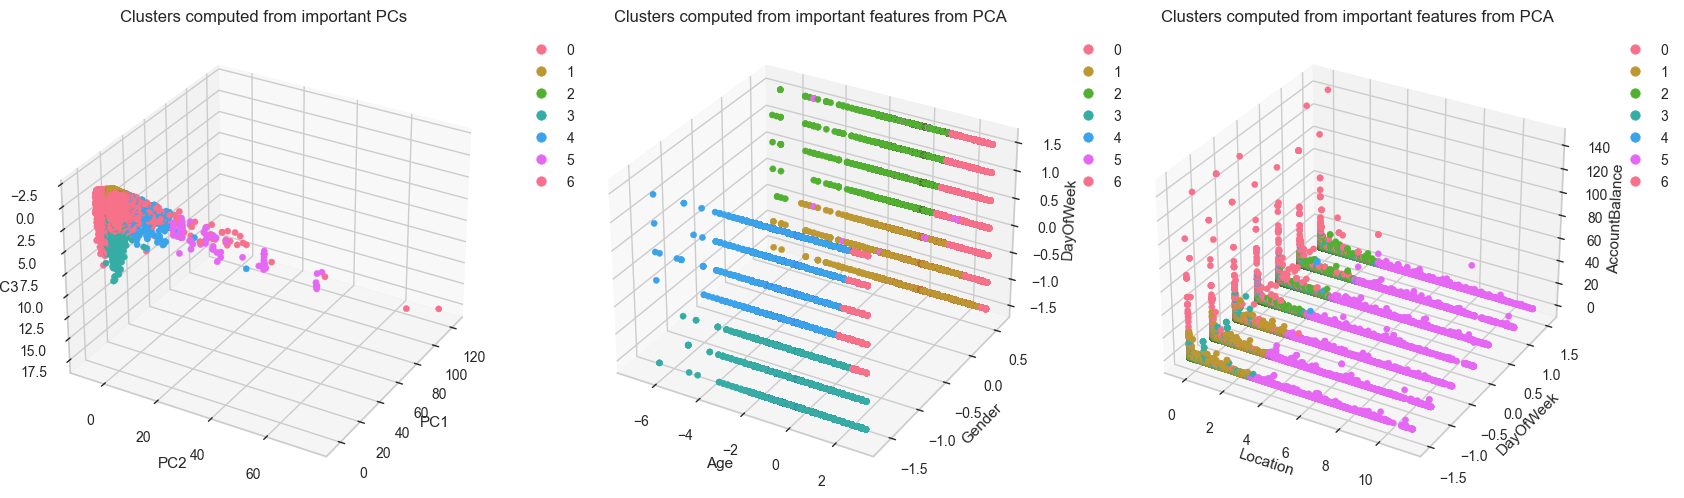

In [ ]:
## Let us visualize how the clusters look on the first 3 PCs and 3 important fearures computed from the two methods
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

fig = plt.figure(figsize=(20, 7.5), dpi=100)

# set up the axes for the first plot
ax = fig.add_subplot(1, 3, 1, projection='3d')
scatter = ax.scatter(pca_comps[:,0],pca_comps[:,1],pca_comps[:,2], c = Kmeans_clusters_PCs, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Clusters computed from important PCs')
ax.legend(*scatter.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
ax.view_init(-150, -30)


# set up the axes for the second plot
ax = fig.add_subplot(1, 3, 2, projection='3d')
scatter = ax.scatter(grouped_scaled_data[most_important_features[0]],df_scaled[most_important_features[1]],df_scaled[most_important_features[2]], 
                        c = Kmeans_clusters_ImpFeatures, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel(most_important_features[0])
ax.set_ylabel(most_important_features[1])
ax.set_zlabel(most_important_features[2])
ax.set_title('Clusters computed from important features from PCA')
ax.legend(*scatter.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# set up the axes for the 3rd plot
ax = fig.add_subplot(1, 3, 3, projection='3d')
scatter = ax.scatter(grouped_scaled_data[most_important_features[3]],grouped_scaled_data[most_important_features[4]],grouped_scaled_data[most_important_features[5]], 
                        c = Kmeans_clusters_ImpFeatures, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel(most_important_features[3])
ax.set_ylabel(most_important_features[4])
ax.set_zlabel(most_important_features[5])
ax.set_title('Clusters computed from important features from PCA')
ax.legend(*scatter.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

### PCA sample

In [49]:
# Assuming df is your DataFrame and you want to sample 30% of your data
df_sample = df_scaled.sample(frac=0.1, random_state=42)

# Now sampled_df contains 30% of the rows of the original DataFrame

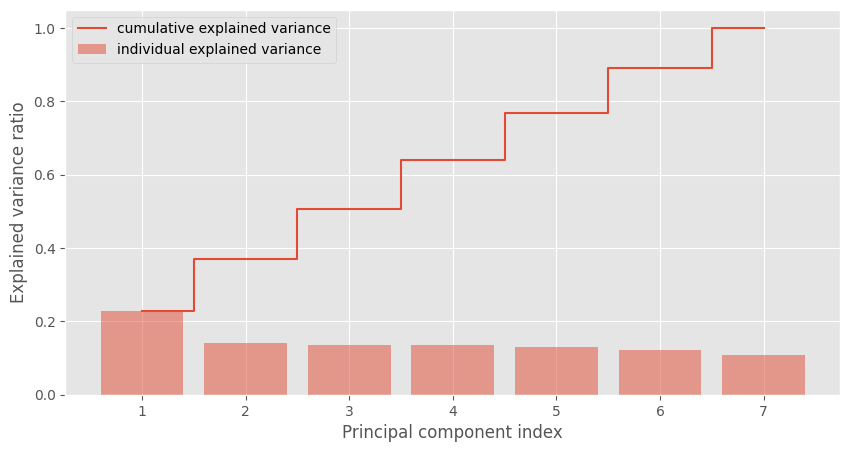

In [50]:

pca = PCA()
pca_comps_sample = pca.fit_transform(df_sample) # pca components
var_exp = pca.explained_variance_ratio_ # variance explained ratio 
cum_var_exp = np.cumsum(var_exp) # cumulative variance

# plot of explained variances
fig = plt.figure(figsize=(10, 5), dpi=100)
plt.bar(range(1,len(var_exp)+1), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,len(var_exp)+1), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()


In [61]:
#Let's say you would like to explain x% variance  
var_exp_thres = 0.85
#calling pcs instance with desired variance explained threshold
pca = PCA(var_exp_thres)  
pca_comps = pca.fit_transform(df_sample)  
print('Number of components to explain {:0.0f}% variance is {}'.format(var_exp_thres*100, pca.n_components_))

Number of components to explain 85% variance is 6


In [62]:
# get the index of the most important feature on EACH component
# we do it using list comprehension
most_important_features_idx = [np.abs(pca.components_[i]).argmax() for i in range(pca.n_components_)]
most_important_features = df_sample.columns[most_important_features_idx]

print('The most important features are:', most_important_features.values)

The most important features are: ['Transaction_Amount' 'Gender' 'Location' 'Frequentie' 'DayOfWeek'
 'Gender']


### DBDSCAN

In [63]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors 

In [64]:
# min_samples >= P+1, with P the number of features
min_samples = pca_comps_sample.shape[1] + 1 

#DBSCAN model building 
dbscan = DBSCAN(eps = 0.5, min_samples = min_samples)
db_clusters = dbscan.fit_predict(pca_comps_sample)

print('dbscan has created clusters:', list(set(db_clusters)))

dbscan has created clusters: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, -1]


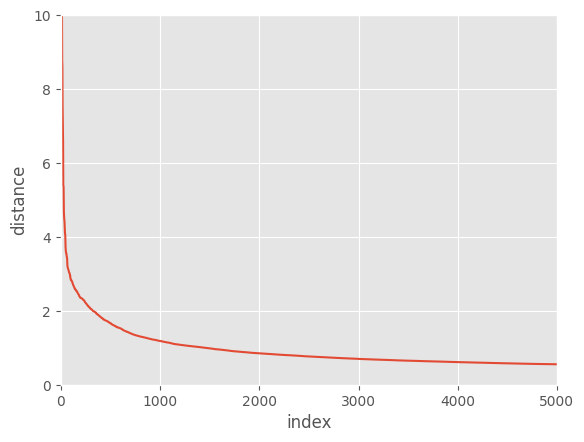

In [53]:
k = min_samples  # Assuming 'k' and 'pca_comps' are already defined

# Fitting the k-nearest neighbors
knn_fit = NearestNeighbors(n_neighbors=k).fit(pca_comps_sample)
distances, indices = knn_fit.kneighbors(pca_comps_sample)  # distances are sorted in ascending order
further_neighbor = distances[:, -1]
further_neighbor[::-1].sort()  # sort the distances in descending order

# Plotting the elbow method plot
plt.plot(further_neighbor)
plt.xlabel('index')
plt.ylabel('distance')
plt.grid(visible=True, which='both')

# Set the x and y axis limits to zoom in. Adjust these values to focus on the part of the graph you want to see.
plt.xlim(0, 5000)  # For example, zoom in on the first 5000 indices.
plt.ylim(0, 10)    # And limit the y-axis to distances of 0 to 20.

plt.show()

In [54]:
# min_samples >= P+1, with P the number of features
min_samples = pca_comps_sample.shape[1] + 1 

#DBSCAN model building 
dbscan = DBSCAN(eps = 2, min_samples = min_samples)
db_clusters = dbscan.fit_predict(pca_comps_sample)

print('dbscan has created clusters:', list(set(db_clusters)))

dbscan has created clusters: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, -1]


In [56]:
k = min_samples
knn_fit = NearestNeighbors(n_neighbors=k).fit(df_sample[most_important_features])
distances, indices = knn_fit.kneighbors(df_sample[most_important_features]) # distances are the distance of each point from k nearest neighbors, sorted in ascending order
further_neighbor = distances[:,-1] = distances[:,-1]
further_neighbor[::-1].sort() #sorting the distance in descending order

#ploting the elbow method plot
plt.plot(further_neighbor)
plt.xlabel('index')
plt.ylabel('distance')
plt.grid(visible=True, which='both')
plt.show()

NameError: name 'most_important_features' is not defined